# MNIST with Keras

This example demonstrates how to build a simple neural network model using Keras to classify handwritten digits from the MNIST dataset. We'll create a model with an input layer, a hidden layer with ReLU activation, and an output layer with softmax activation. The model will be compiled with the appropriate loss function, optimizer, and metrics before training on the MNIST dataset.

### Importing Libraries

First we need to import the necessary libraries for building the neural network model. We also need to set the backend to tensorflow and disable the GPU (if available) for this example.

In [21]:
import os

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Set backend to tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

To check the backend keras is using, we can run the following code:

In [22]:
from keras import backend as k
k.backend()

'tensorflow'

As we can see, the backend is set to 'tensorflow'. This means that Keras will use TensorFlow as the backend for tensor operations.

### Creating the model

We'll create a simple neural network model for classifying MNIST digits (0-9). The model will have an input layer, a hidden layer with ReLU activation, and an output layer with softmax activation.

In [23]:
# Create the model
inputs = keras.Input(shape=(784,))

# Hidden layer with 256 units and ReLU activation function
x = layers.Dense(256, activation="relu")(inputs)

# Output layer with 10 units and softmax activation function
outputs = layers.Dense(10, activation="softmax")(x)

# Create the model with the input and output layers and name it "mnist_model"
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

This code block creates a neural network model with the following layers:

    An input layer is created with 784 units (representing 28x28 pixels).
    A hidden layer is added with 256 units and a ReLU activation function.
    An output layer is created with 10 units (for digits 0-9) and a softmax activation function (outputting probabilities that sum to 1).
    The model, named "mnist_model", is built using the input and output layers.
    
    shape=(784,) means that the input is a 1D array with 784 elements.

We can check the summary of the model with the following code:

In [24]:
# Display the model summary
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

The model summary provides information about the layers, output shapes, and number of parameters in the model. Here's what each column represents:

    - Layer (type): Indicates whether the layer is input, hidden, or output.
    - Output Shape: The shape of the output tensor (a multi-dimensional array).
    - Param #: Number of parameters (weights) in the layer.

The model has a total of 203,530 parameters, which are distributed as follows:

    input_layer: 0 parameters
    dense: 200,960 parameters (784 inputs × 256 units + 256 bias)
    dense_1: 2,570 parameters (256 inputs × 10 units + 10 bias)

Parameters consist of weights and biases. Weights are learned by the model to make predictions, while biases adjust those predictions. The number of parameters reflects model complexity: more parameters require more data for training.

### Loading the MNIST dataset

Next, we'll load the MNIST dataset and preprocess the data.

In [25]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In the above code block we perform the following steps:

    - The MNIST dataset is loaded using keras.datasets.mnist.load_data().
    - The dataset is split into training (x_train, y_train) and test sets (x_test, y_test), where x contains the images and y contains the labels.
    - The pixel values are normalized to the range [0, 1] by dividing by 255.
    - The images are reshaped from 28x28 pixels to 784-element vectors to match the model's input shape.
    
The training set contains 60,000 images, while the test set contains 10,000 images. Each image is a 28x28 grayscale picture of a handwritten digit (0-9). The pixel values are integers ranging from 0 to 255, which are normalized to floating-point values between 0 and 1. The labels are integers ranging from 0 to 9.

### Compiling the model

Before training the model, we need to compile it with the appropriate loss function, optimizer, and metrics.

In [26]:
# Display the shape of the training and test sets
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

The model is compiled with the following parameters:
    
        Loss function: SparseCategoricalCrossentropy (used for integer labels).
        Optimizer: Adam (a popular optimization algorithm).
        Metrics: Accuracy (the fraction of correctly classified images).
        
The model is now ready for training on the MNIST dataset.

### Training the model

We'll train the model on the MNIST dataset using the training set and validate it using the test set.

In [27]:
# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8631 - loss: 0.4822 - val_accuracy: 0.9558 - val_loss: 0.1497
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9613 - loss: 0.1336 - val_accuracy: 0.9671 - val_loss: 0.1086
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9757 - loss: 0.0818 - val_accuracy: 0.9703 - val_loss: 0.1005
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9827 - loss: 0.0606 - val_accuracy: 0.9725 - val_loss: 0.0906
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9884 - loss: 0.0433 - val_accuracy: 0.9732 - val_loss: 0.0847
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9910 - loss: 0.0311 - val_accuracy: 0.9740 - val_loss: 0.0877
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9932 - loss: 0.0243 - val_accuracy: 0.9753 - val_loss: 0.0828
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9962 - loss: 0.0163 - val_accuracy: 0.

Here we train the model using the following parameters:

    - Training data: x_train (images) and y_train (labels).
    - Batch size: 64 (number of samples per gradient update).
    - Epochs: 10 (number of passes through the training data).
    - Validation split: 0.2 (20% of the training data used for validation).
    
The training process involves adjusting the model's weights and biases to minimize the loss function. The loss function measures the difference between predicted and actual labels. The optimizer updates the model's parameters based on the loss function's gradient. The accuracy metric tracks the model's performance on the training and validation sets.

### Evaluating the model

After training the model, we can evaluate its performance on the test set.

In [28]:
# Evaluate the model on the test set
test_scores = model.evaluate(x_test, y_test, verbose=2)

# Display the test loss and accuracy
print(f"Test loss: {test_scores[0] * 100:.4f}%")
print(f"Test accuracy: {test_scores[1] * 100:.4f}%")

313/313 - 0s - 2ms/step - accuracy: 0.9746 - loss: 0.0855
Test loss: 8.5505%
Test accuracy: 97.4600%


The model is evaluated on the test set using the evaluate method, which returns the test loss and accuracy. The test loss is the average loss over all test samples, while the test accuracy is the fraction of correctly classified images.

The loss and accuracy on the test set provide an estimate of the model's performance on unseen data. A high test accuracy indicates that the model generalizes well to new examples.

A loss of 8.6% and accuracy of 97.5% on the test set suggest that the model performs well on classifying MNIST digits.

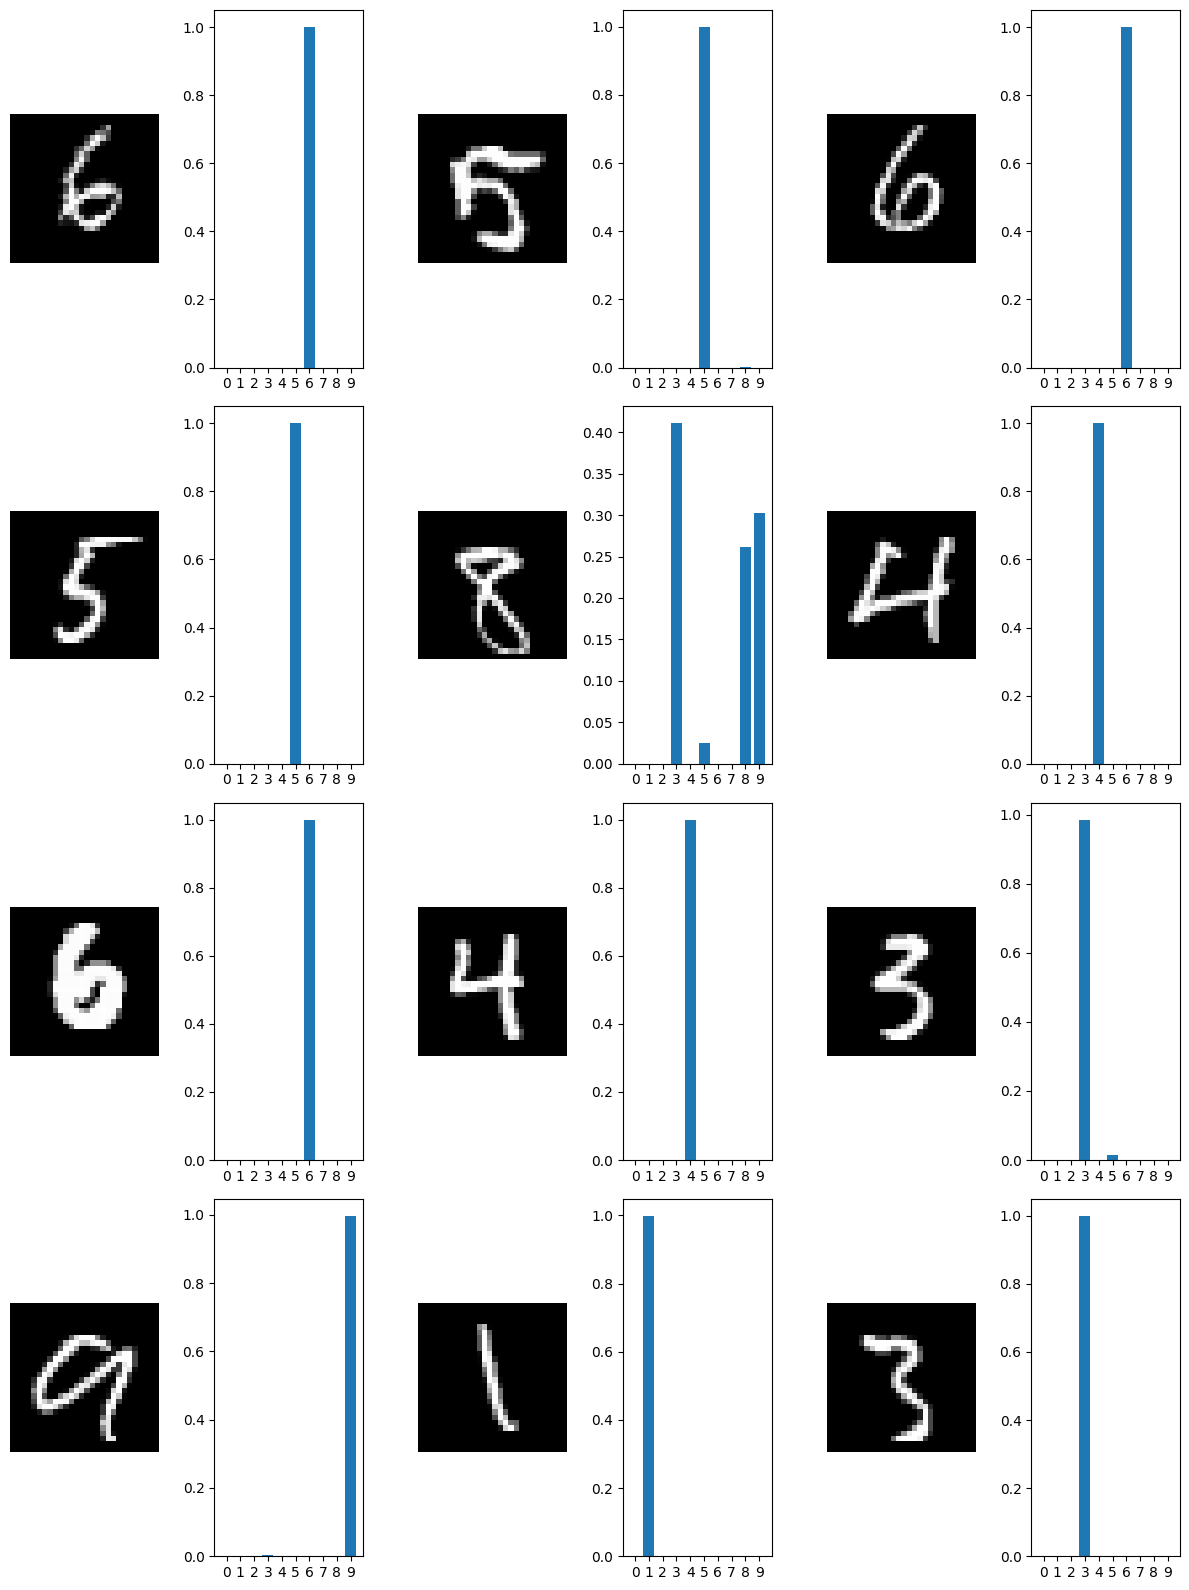

In [32]:
x = x_test
y = model(x)
start = 2000

# Set number of rows and columns
rows = 4 
cols = 3

# Create a figure to hold all subplots
plt.figure(figsize=(12, rows * 4))

for k in range(rows * cols):
    # Image plot (left)
    plt.subplot(rows, cols * 2, 2 * k + 1)
    plt.imshow(x[start + k].reshape((28, 28)), cmap='gray')
    plt.axis('off')  # Remove axis for cleaner view

    # Bar plot (right)
    plt.subplot(rows, cols * 2, 2 * k + 2)
    ind = np.arange(0, 10)
    plt.bar(ind, y[start + k].numpy().flatten())
    plt.xticks(range(10))

plt.tight_layout()
plt.show()

The above code block visualizes the model's predictions on a subset of the test set. The left column shows the input images, while the right column displays the model's predicted probabilities for each digit (0-9).